In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import math as mth
import scipy.stats as stats
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

## Задание 1

В результате эксперимента получены статистические данные,
представленные в виде статистического ряда.

In [2]:
data = pd.Series([76, 28, 151, 91, 60, 204, 117, 102, 128, 217,  
              120, 66, 207, 126, 124, 152, 27, 221, 131, 51,
              241, 77, 250, 134, 123, 147, 184, 195, 47, 160, 
              159, 74, 169, 178, 79, 129, 250, 223, 182, 96,
              135, 199, 56, 25, 82, 116, 44, 229, 145, 203,
              88, 209, 146, 224, 239, 103, 201, 245, 130, 163,
              71, 165, 176, 194, 78, 154, 99, 78, 127, 69,
              171, 173, 31, 181, 117, 84, 73, 161, 240, 149,
              247, 107, 140, 53, 205, 155, 29, 132, 185, 179,
              180, 128, 42, 114, 93, 191, 174, 210, 133, 226])

### 1) записать значения результатов эксперимента в виде вариационного ряда;

In [52]:
ar=data.value_counts(bins=9, sort=False).reset_index()
ar.columns=['Интервал','Количество значений']
ar

,Интервал,Количество значений
0,"(24.773999999999997, 50.0]",8
1,"(50.0, 75.0]",9
2,"(75.0, 100.0]",12
3,"(100.0, 125.0]",10
4,"(125.0, 150.0]",16
5,"(150.0, 175.0]",13
6,"(175.0, 200.0]",12
7,"(200.0, 225.0]",11
8,"(225.0, 250.0]",9


### 2) найти размах варьирования и разбить его на 9 интервалов;

In [5]:
data.max()

250

In [6]:
data.min()

25

In [7]:
print('размах варьирования:', data.max()-data.min())

размах варьирования: 225


In [8]:
intervals=[25, 50, 75, 100, 125, 150, 175, 200, 225, 250]

### 3) построить полигон частот, гистограмму относительных частот, ящик с усами и график эмпирической функции распределения;

#### Полигон частот

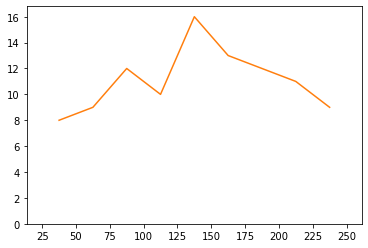

In [9]:
intervals=[25, 50, 75, 100, 125, 150, 175, 200, 225, 250]
y,edges,_=plt.hist(data, bins=9, histtype='step', edgecolor = 'w')
midpoints=0.5*(edges[1:]+edges[:-1])
plt.plot(midpoints, y)
plt.xticks(intervals)
plt.show()

#### Гистограмма относительных частот

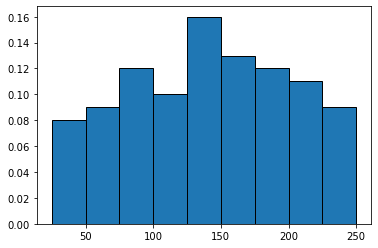

In [10]:
fig = plt.figure()
ax = fig.add_subplot (111)
ax.hist(data, edgecolor='black', bins = 9, weights=np.ones_like (data) / len (data)) 
plt.show()

#### Ящик с усами

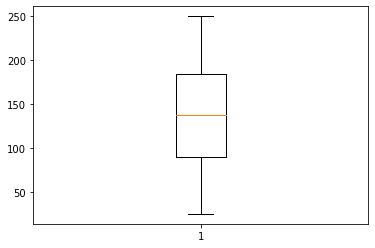

In [11]:
plt.boxplot(data)
plt.show()

In [12]:
data.describe()

count    100.000000
mean     139.920000
std       61.103271
min       25.000000
25%       90.250000
50%      137.500000
75%      184.250000
max      250.000000
dtype: float64

#### График эмпирической функции распределения

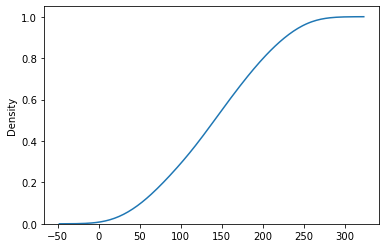

In [13]:
sns.kdeplot(data, cumulative=True)
plt.show()

### 4) найти числовые характеристики выборки: выборочное среднее и выборочную дисперсию; выборочные коэффициенты асимметрии и эксцесса

#### Выборочное среднее

In [14]:
np.mean(data)

139.92

#### Выборочная дисперсия

In [15]:
np.var(data)

3696.2736000000004

#### Коэффициент асимметрии

In [16]:
from scipy.stats import skew
skew(data, bias= False )

-0.05095513898775224

#### Коэффициент эксцесса

In [17]:
from scipy.stats import kurtosis
kurtosis(data, bias= False )

-0.914058462642434

### 5) приняв в качестве нулевой гипотезы H 0 : генеральная совокупность, из которой извлечена выборка, имеет нормальное распределение, проверить её, пользуясь критерием Пирсона при уровне значимости 0.05

In [18]:
stats.chisquare(data)

Power_divergenceResult(statistic=2641.7049742710124, pvalue=0.0)

p-value равно 0, поэтому нулевая гипотеза отвергается и принимается альтернативная: генеральная совокупность, из которой извлечена выборка, не имеет нормальное распределение

Перепроверю с помощью критерия Шапиро-Уилка

In [19]:
alpha = 0.05

results = stats.shapiro(data)
p_value = results[
    1
] 

print('p-значение: ', p_value)

if p_value < alpha:
    print('Отвергаем нулевую гипотезу: распределение не нормально')
else:
    print('Не получилось отвергнуть нулевую гипотезу, всё нормально') 

p-значение:  0.04147115349769592
Отвергаем нулевую гипотезу: распределение не нормально


### 6) найти доверительные интервалы для математического ожидания и среднего квадратичного отклонения при надежности 95%

#### Для математического ожидания

In [20]:
stats.norm.interval(alpha=0.95, loc=np.mean(data), scale=stats.sem(data))

(127.94397899824261, 151.89602100175736)

#### Для среднего квадратичного отклонения 

In [21]:
stats.norm.interval(alpha=0.95, loc=np.std(data), scale=stats.sem(data))

(48.82096576568037, 72.77300776919512)

## Задание 2

Для Х

In [25]:
x_df = pd.DataFrame({'Xi': [300, 305, 310, 315, 320, 325],
                  'ni': [11, 7, 31, 19, 20, 12]})
x_df['M']=x_df['Xi']*x_df['ni']
x_df['D']=x_df['Xi']**2*x_df['ni']
x_df

,Xi,ni,M,D
0,300,11,3300,990000
1,305,7,2135,651175
2,310,31,9610,2979100
3,315,19,5985,1885275
4,320,20,6400,2048000
5,325,12,3900,1267500


Для Y

In [26]:
y_df = pd.DataFrame({'Yi': [2400, 2440, 2480, 2520, 2560, 2600, 2640, 2680],
                  'ni': [5, 5, 12, 22, 20, 12, 11, 13]})
y_df['M']=y_df['Yi']*y_df['ni']
y_df['D']=y_df['Yi']**2*y_df['ni']
y_df

,Yi,ni,M,D
0,2400,5,12000,28800000
1,2440,5,12200,29768000
2,2480,12,29760,73804800
3,2520,22,55440,139708800
4,2560,20,51200,131072000
5,2600,12,31200,81120000
6,2640,11,29040,76665600
7,2680,13,34840,93371200


In [27]:
av_x=sum(x_df['M'])/sum(x_df['ni'])
print('Среднее Х:', av_x)

Среднее Х: 313.3


In [28]:
av_y=sum(y_df['M'])/sum(y_df['ni'])
print('Среднее Y:', av_y)

Среднее Y: 2556.8


In [29]:
std_x=((sum(x_df['D'])/sum(x_df['ni']))-av_x**2)**0.5
print('Стандартное отклонение Х:', std_x)

Стандартное отклонение Х: 7.321885003193237


In [30]:
std_y=((sum(y_df['D'])/sum(y_df['ni'])-av_y**2))**0.5
print('Стандартное отклонение Y:', std_y)

Стандартное отклонение Y: 76.66655072454247


In [31]:
av_xy=2400*5*300+2440*4*300+2440*1*305+2480*2*300+2480*3*305+2480*7*310+2520*3*305+2520*10*310+2520*9*315+2560*14*310+2560*6*315+2600*4*315+2600*8*320+2640*5*320+2640*6*325+2680*7*320+2680*6*325

In [32]:
print('Среднее произведение xy:', av_xy/100)

Среднее произведение xy: 801550.0


In [33]:
corr=((av_xy/100)-av_x*av_y)/(std_x*std_y)
print('Линейный коэффициент корреляции:', corr)

Линейный коэффициент корреляции: 0.8988433089495765


In [40]:
a= (corr*std_y)/std_x
a

9.411676925947976

In [41]:
b=av_y-a*av_x
b

-391.8783808995008

Уравнение прямой регрессии x на y: y=9.411*x-391.878

In [44]:
sh = pd.DataFrame({'Y': [2400,2440, 2440, 2480, 2480, 2480, 2520, 2520, 2520, 2560, 2560, 2600, 2600],
                  'X': [300, 300, 305, 300, 305, 310, 305, 310, 315, 310, 315, 315, 320]})

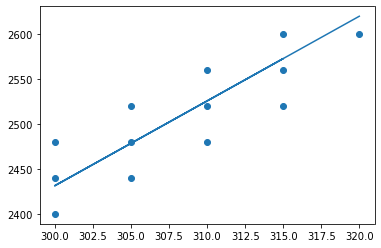

In [46]:
plt.scatter(sh.X, sh.Y)
plt.plot(sh['X'], 9.411*sh['X']-391.878)
plt.show()